<a href="https://colab.research.google.com/github/KS0999/ML/blob/main/review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import torch
#setting weight & bias

weight = 0.7
bias = 0.3

#data split

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(1)
y=weight*X+bias

In [110]:
data_split=int(len(X)*0.8)
X_train,y_train=X[:data_split],y[:data_split]
X_test,y_test=X[data_split:],y[data_split:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [111]:
def Linear_Regression(prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,s=10,c="g",label="train")
  plt.scatter(X_test,y_test,s=10,c="b",label="test")
  if prediction is not None:
    plt.scatter(prediction,y_test,s=10,c="r",label="prediction")
  plt.legend()


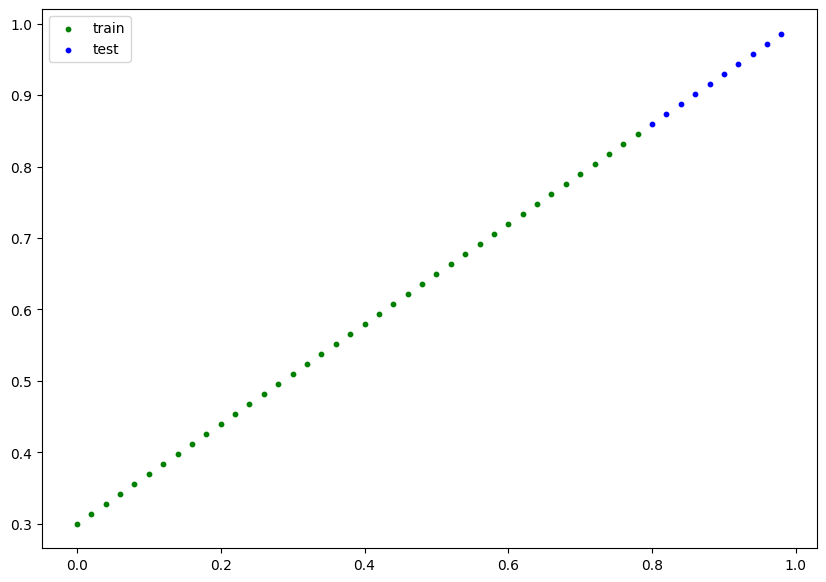

In [112]:
Linear_Regression();
plt.show()

In [113]:
import torch.nn as nn
class LinearRegressionModel (nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=torch.nn.Linear(in_features=1,
                                      out_features=1)
  def forward(self,x):
    return self.linear_layer(x)
model=LinearRegressionModel()

In [114]:
torch.manual_seed(0)
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0075]])),
             ('linear_layer.bias', tensor([0.5364]))])

In [115]:
loss_function=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01)

In [116]:
epochs=500

for epochs in range(epochs):
  #training
  model.train()
  y_pred=model(X_train)
  loss=loss_function(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #testing
  model.eval()
  with torch.inference_mode():
    test_pred=model(X_test)
    test_loss=loss_function(test_pred,y_test)
  if epochs % 20 ==0:
    print(f"Epoch:{epochs},Loss:{loss},Test_loss{test_loss}")

Epoch:0,Loss:0.14423510432243347,Test_loss0.3894590735435486
Epoch:20,Loss:0.13230934739112854,Test_loss0.33455294370651245
Epoch:40,Loss:0.12454460561275482,Test_loss0.30234307050704956
Epoch:60,Loss:0.11756458133459091,Test_loss0.2803034782409668
Epoch:80,Loss:0.110584557056427,Test_loss0.2582639753818512
Epoch:100,Loss:0.10370694100856781,Test_loss0.24171936511993408
Epoch:120,Loss:0.09683561325073242,Test_loss0.225861594080925
Epoch:140,Loss:0.08996454626321793,Test_loss0.20931664109230042
Epoch:160,Loss:0.08309973776340485,Test_loss0.1934584379196167
Epoch:180,Loss:0.07623177021741867,Test_loss0.17760023474693298
Epoch:200,Loss:0.06935827434062958,Test_loss0.16174201667308807
Epoch:220,Loss:0.0624924972653389,Test_loss0.14519695937633514
Epoch:240,Loss:0.05562768131494522,Test_loss0.12933874130249023
Epoch:260,Loss:0.048754412680864334,Test_loss0.11348054558038712
Epoch:280,Loss:0.04188524931669235,Test_loss0.0969354510307312
Epoch:300,Loss:0.03502044826745987,Test_loss0.081077262

In [117]:
with torch.inference_mode():
  y_pred=model(X_test)
y_pred

tensor([[0.8524],
        [0.8662],
        [0.8801],
        [0.8939],
        [0.9077],
        [0.9215],
        [0.9354],
        [0.9492],
        [0.9630],
        [0.9768]])

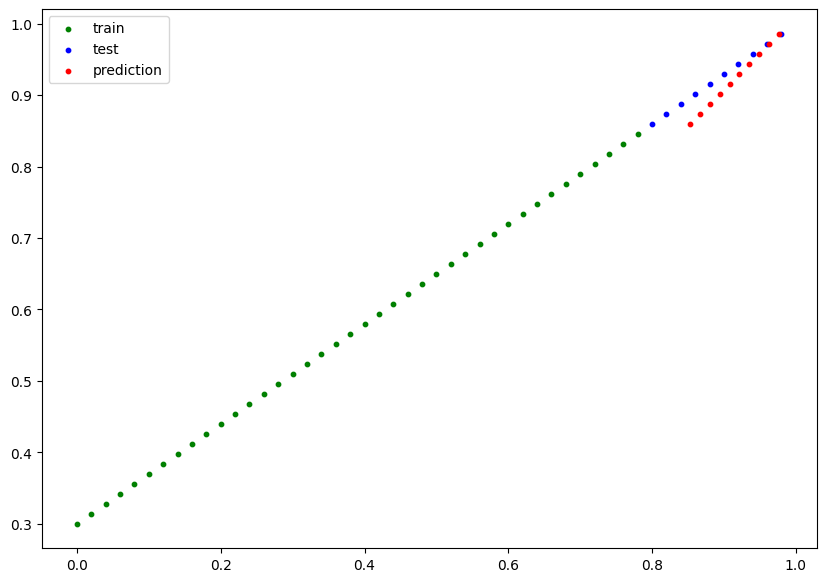

In [118]:
Linear_Regression(prediction=y_pred.detach().numpy());
plt.show()

In [119]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6912]])),
             ('linear_layer.bias', tensor([0.2994]))])

In [120]:
from pathlib import Path

model_path=Path("Model")
model_path.mkdir(parents=True,
                 exist_ok=True)
model_name="review-LinearRegressionModel"
model_path_name=model_path/model_name
torch.save(obj=model.state_dict(),
           f=model_path_name)